<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

In [1]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [3]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
df = df.drop('Unnamed: 32', axis='columns')

In [5]:
cols = []
for col in df.columns:
  if 'id' in col:
    pass
  else:
    cols.append(col)

cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [6]:
len(cols)

30

In [0]:
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
df_std = std_sc.fit_transform(df[cols])

In [8]:
# shape of df_std is still same so we're good
len(df_std), len(df_std[0])

(569, 30)

In [0]:
pca_all = PCA(30)
pc_all = pca_all.fit_transform(X=df_std)

In [10]:
len(pc_all), len(pc_all[0])

(569, 30)

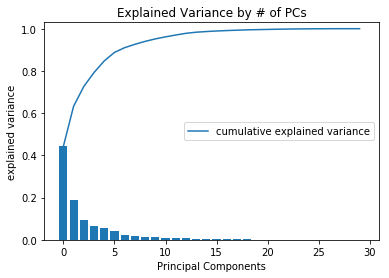

In [57]:
# hard to see exact number it starts to fall off on.
plt.bar(range(0,30), pca_all.explained_variance_ratio_)
plt.plot(range(0,30), [sum(pca_all.explained_variance_ratio_[0:i]) for i in range(1,31)], label='cumulative explained variance')

plt.xlabel('Principal Components')
plt.ylabel('explained variance')
plt.title('Explained Variance by # of PCs')
plt.legend(loc=7)
plt.ylim(0,1.03)
plt.show()

In [12]:
# 7 looks to be where it starts becoming more and more asymptotic
# 2 PCs do a lot of work for us so will plot that aswell
[sum(pca_all.explained_variance_ratio_[0:i]) for i in range(1,31)]

[0.4427202560752631,
 0.6324320765155941,
 0.726363709089908,
 0.7923850582446096,
 0.8473427431680723,
 0.8875879635669057,
 0.9100953006967308,
 0.9259825386969441,
 0.9398790324425352,
 0.9515688143366667,
 0.961366004212647,
 0.9700713832200258,
 0.9781166330919931,
 0.9833502905469195,
 0.9864881227145469,
 0.9891502160796992,
 0.9911301840050235,
 0.9928841434552499,
 0.994533396514475,
 0.9955720432628138,
 0.996571139726514,
 0.9974857864775684,
 0.9982971477364675,
 0.9988989813031391,
 0.9994150236823043,
 0.9996876116777818,
 0.9999176271402878,
 0.9999706050693259,
 0.9999955651725728,
 1.0000000000000002]

In [0]:
# kmeans before PCA to make sure i have it down

sum_of_sqs = []

for k in range(1,31):
  km = KMeans(n_clusters=k)
  km = km.fit(df[cols])
  sum_of_sqs.append(km.inertia_)
  

In [14]:
len(sum_of_sqs)

30

Text(0, 0.5, 'inertia')

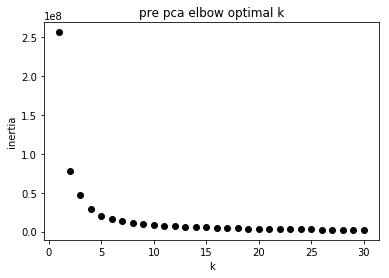

In [62]:
plt.plot(range(1,31), sum_of_sqs, 'ok')

plt.xlabel('k')
plt.title('pre pca elbow optimal k')
plt.ylabel('inertia')

In [16]:
for i in range(1,30):
  print(abs(sum_of_sqs[i] - sum_of_sqs[i-1]))

178734144.07590365
30606489.456308268
18110068.770010773
8686664.029876914
3981160.9200855996
3308980.633690389
2023197.2091580816
1682388.5672231
1165134.8455202924
904522.0489533003
563165.7433568966
643611.1147137713
520255.7684138967
482125.7764596185
515424.2766819671
421307.536320935
291782.04358169483
303426.3270783862
221402.02439249074
203579.00992803462
192874.64694165578
151564.02104193857
161139.68387358775
127928.4496230227
199228.55084465165
94159.13767055655
156905.8809744995
56639.27624189062
126576.18381334539


In [17]:
# 1.67m -> 1.04m is a key spot
# 860k -> 495k is a key spot
for i in range(3,15):
  print(abs(sum_of_sqs[i] - sum_of_sqs[i-1]))

18110068.770010773
8686664.029876914
3981160.9200855996
3308980.633690389
2023197.2091580816
1682388.5672231
1165134.8455202924
904522.0489533003
563165.7433568966
643611.1147137713
520255.7684138967
482125.7764596185


In [18]:
sum_of_sqs[12] - sum_of_sqs[11]

-643611.1147137713

In [19]:
len(sum_of_sqs[:12])   # 13 means bc 12 not included in this list slicing

12

In [0]:
solution_df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")

In [0]:
# and by same process the other big point is 10 means. 
# add 8 means in there too.

ms = [2, 8, 10, 13]

for means in ms:
  km = KMeans(n_clusters=means)
  km = km.fit(df[cols])
  solution_df[str(means) + '_Cluster_Label'] = km.labels_

In [0]:
# ok so now we will add PCA before doing our clustering
# i said i wanted to do it with specifically 2 and 7, but lets start with 2 so we can plot.

pca_2 = PCA(2)
x = pca_2.fit_transform(X=df_std)

In [66]:
len(x), len(x[0])

(569, 2)

In [67]:
pca_2_df = pd.DataFrame({'pc1': x[:,0], 'pc2': x[:,1]})
pca_2_df.head()

,pc1,pc2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


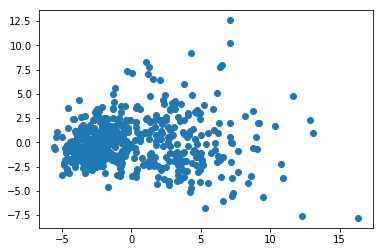

In [68]:
# this does not look like its doing a very good job.
plt.scatter(x='pc1', y='pc2', data=pca_2_df)

In [0]:
pca_2_df['diagnosis'] = solution_df.diagnosis_numeric

In [0]:
km = KMeans(n_clusters=2)
km = km.fit(pca_2_df[['pc1', 'pc2']])
solution_df['pca2_K_means_label'] = km.labels_
pca_2_df['2_means_label'] = km.labels_

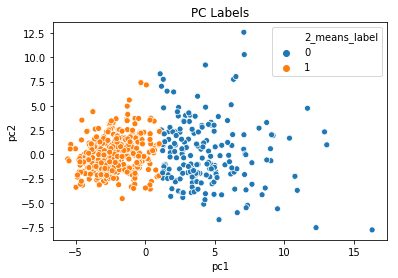

In [77]:
sns.scatterplot(x='pc1', y='pc2', data=pca_2_df, hue='2_means_label')
plt.title('PC Labels');

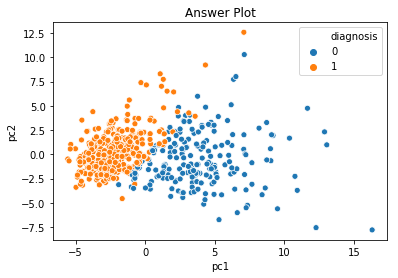

In [74]:
sns.scatterplot(x='pc1', y='pc2', data=pca_2_df, hue='diagnosis')
plt.title('Answer Plot');

In [0]:
pca_3 = PCA(3)
x = pca_3.fit_transform(X=df_std)

pca_3_df = pd.DataFrame({'pc1': x[:,0], 'pc2': x[:,1],'pc3': x[:,2]})

km = KMeans(n_clusters=2)
km = km.fit(pca_2_df[['pc1', 'pc2', 'pc3']])
pca_3_df['2_means_label'] = km.labels_
solution_df['pca3_K_means_label'] = km.labels_

In [0]:
def pca_k_mean_labeler(num, k, df_std=df_std):
  
  pca = PCA(num)
  x = pca.fit_transform(X=df_std)
  
  pca_df = pd.DataFrame(x)
  
  km = KMeans(n_clusters=k)
  km = km.fit(pca_df)
  
  return km.labels_

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.

In [0]:
solution_df['diagnosis_numeric'] = solution_df.diagnosis.map({'M':0, 'B':1})

In [0]:
solution_df['Pre_PCA_2Means_Cluster_Accuracy'] = (solution_df['2_Cluster_Label'] == solution_df['diagnosis_numeric'])

In [45]:
solution_df.Pre_PCA_2Means_Cluster_Accuracy.mean()

0.8541300527240774

In [46]:
solution_df['2_Cluster_Label'].value_counts(sort=False,normalize=True)

0    0.230228
1    0.769772
Name: 2_Cluster_Label, dtype: float64

In [48]:
solution_df.diagnosis_numeric.value_counts(sort=False, normalize=True)

0    0.372583
1    0.627417
Name: diagnosis_numeric, dtype: float64

In [0]:
solution_df['two_pcs_2Means_Cluster_Accuracy'] = (solution_df['pca2_K_means_label'] == solution_df.diagnosis_numeric)

In [79]:
solution_df.two_pcs_2Means_Cluster_Accuracy.mean()

0.9068541300527241

In [0]:
solution_df['three_pcs_2Means_Cluster_Accuracy'] = (pca_2_mean_labeler(3) != solution_df.diagnosis_numeric)

In [106]:
solution_df.three_pcs_2Means_Cluster_Accuracy.mean()

0.9103690685413005

In [0]:
solution_df['pca7_K_means_label'] = pca_2_mean_labeler(7)

In [0]:
solution_df['seven_pcs_2Means_Cluster_Accuracy'] = (solution_df['pca7_K_means_label'] != solution_df.diagnosis_numeric)

In [96]:
solution_df.seven_pcs_2Means_Cluster_Accuracy.mean()

0.9103690685413005

In [116]:
pca_3_df['diagnosis_numeric'] = solution_df['diagnosis_numeric'].map({0:1, 1:0})
pca_3_df.head(1)

,pc1,pc2,pc3,2_means_label,diagnosis_numeric
0,9.192837,1.948581,-1.123224,1,1


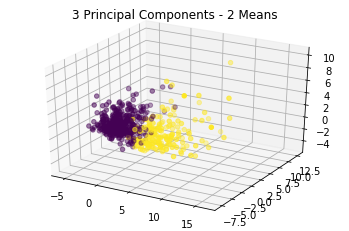

In [132]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('3 Principal Components - 2 Means')
t= pca_3_df['2_means_label']
ax.scatter(pca_3_df.pc1, pca_3_df.pc2, pca_3_df.pc3, c=t);